# 신경망 학습

## 4.1. 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다. 신경망은 데이터를 보고 학습할 수 있다. 신경망의 학습이란 '가중치 매개변수의 최적값을 데이터를 보고 자동으로 결정하는 것'을 뜻한다.

### 4.1.1. 데이터 주도 학습

기계학습은 데이터가 생명이다. 데이터에서 패턴을 발견하고 데이터로 이야기를 만들어내는 것이다.
기계학습이서 특징을 찾아내는것은 사람의 개입을 최소화하는 방향으로 진행된다.
기계학습에서 모아진 데이터로부터 규칙을 발견하는 것은 '기계'의 역할이다.

딥러닝에서는 신경망이 데이터를 있는 그대로 학습한다. 신경망은 이미지에 포함된 중요한 특징까지도 '*기계*'가 스스로 학습한다.

### 4.1.2. 훈련 데이터와 시험 데이터

시계학습 문제는 데이터를 *훈련 데이터*와 *시험 데이터*로 나눠 학습과 시험을 수행하는 것이 일반적이다.

우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다.



## 4.2. 손실 함수

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이 학습의 목표이다.

신경망 학습에서 사용하는 지표는 손실 함수(loss function)이다. 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표이다. 이 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

손실 함수는 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

### 4.2.1. 오차제곱합

가장 많이 쓰이는 손실 함수는 `오차제곱합`이다. 이 함수는 다음과 같이 정의된다.

$$
E = \frac{1}{2} \sum_{k} (y_k - t_k)^2
$$

여기서 $y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.

In [6]:
import numpy as np

def sum_squares_error(y, t):
  """오차제곱합
  
  Args:
      y (ndarray): 신경망의 출력
      t (ndarray): 정답 레이블

  Returns:
      float: 오차제곱합
  """
  return (1/2) * (np.sum((y-t)**2))

In [7]:
# 2가 정답 원-핫 인코딩
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 신경망이 추정한 확률 분포 2일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(sum_squares_error(np.array(y), np.array(t)))

# 신경망이 추정한 확률 분포 7일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


$y_{k}$는 신경망의 출력, $t_{k}$는 정답 레이블, k는 데이터의 차원 수를 나타낸다.

신경망의 출력 y는 소프트맥스 함수의 출력이며, 정답 레이블 t는 원-핫 인코딩이다.

위의 경우 첫번째 출력의 오차제곱합은 0.0975, 두번째 오차제곱합은 0.5975이다. 따라서 첫번째 출력이 정답에 가깝다고 판단한다.

### 4.2.2. 교차 엔트로피 오차

$$
E = -\sum_{k} t_{k} \log y_{k}
$$

여기에서 log는 밑이 e인 자연로그$(\log_e)$이다.$y_{k}$는 신경망의 출력, $t_{k}$는 정답 레이블(원-핫 인코딩), k는 데이터의 차원 수를 나타낸다.

그래서 정답에 해당하는 인덱스 원소만 1이고 나머지는 0이기 때문에 실질적으로 정답일 때의 추정($y_{k}$)의 자연로그를 계산하는 식이다.

정답이 2고 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-\log0.6=0.51$이 된다. 같은 조건에서 신경망 출력이 0.1이라면 $-\log0.1=2.30$이 된다.

교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

**정리**

* $y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.
* $t_k$는 정답에 해당하는 원-핫 인코딩이다.
* 식이 의미하는 것은 정답일 때의 출력이 전체 값을 정하게 된다.
* 정답이 2일 때, $y_2$가 1에 가까워질수록 오차는 0에 가까워진다.

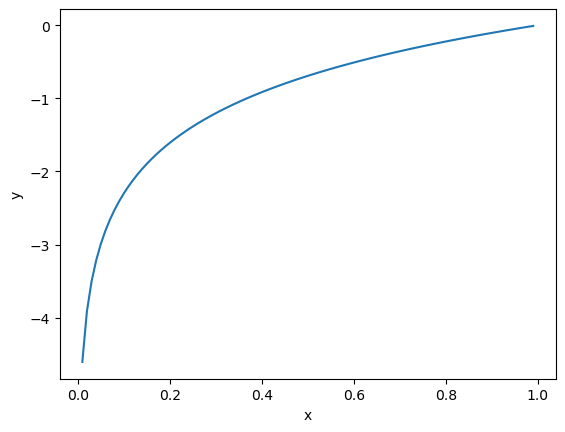

In [4]:
# 자연로그 y=logx의 그래프

import matplotlib.pyplot as plt
x = np.arange(0.01, 1, 0.01) # 0.01부터 1까지 0.01 간격의 배열 x
y = np.log(x) # 자연로그 y=logx
plt.plot(x, y) # x와 y의 그래프를 그린다
plt.xlabel('x') # x축 이름
plt.ylabel('y') # y축 이름
plt.show()  # 그래프를 화면에 표시

x가 1에 가까워질수록 -log(x)는 0에 가까워진다. 반대로 x가 0에 가까워질수록 -log(x)는 무한대로 커진다.


In [4]:
# Python에서 교차 엔트로피 오차를 구현
def cross_entropy_error(y, t):
  """교차 엔트로피 오차를 구하는 함수
  
  여기서는 y가 0이 되지 않도록 delta를 더해줍니다. 
  이는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없기 때문입니다.
  
  Arguments:
      y {np.array} -- 예측값
      t {np.array} -- 정답
  """
  delta = 1e-7 # y가 0이 되는 것을 방지한다.
  return -np.sum(t * np.log(y + delta))

출력값 y1과 y2의 교차 엔트로피 결과를 확인해보자. t는 2가 정답이라는 원-핫-인코딩이다.


In [5]:
# 2가 정답
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 2일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 7일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3. 미니배치 학습

미니배치 학습은 데이터가 많을 때 데이터의 일부만 골라 학습을 수행하는 방법이다. 

**훈련 데이터 모두에 대한 손실 함수의 합을 구하는 식**
$$
E = -\frac{1}{N} \sum_n \sum_k t_{nk} \log y_{nk}
$$

데이터가 N개일 때, $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다.

($y_{nk}는 신경망의 출력, $t_{nk}$는 정답 레이블, N은 데이터의 차원 수를 나타낸다.)

마지막에 N으로 나누어 정규화하는 것을 잊지 말아야 한다.

N으로 나눔으로써 '평균 손실 함수'를 구할 수 있다. 평균 손실 함수는 통일된 지표가 된다.

하지만 데이터가 많을 때는 모든 데이터를 대상으로 손실 함수를 계산하는 것은 현실적이지 않다. 그래서 데이터 일부를 추려 전체의 '근사치'로 이용한다. 이 일부를 미니배치라고 한다.

In [5]:
# 미니배치 학습
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(f"훈련 데이터 크기: {x_train.shape}")

# 무작위로 10장만 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train_size에서 batch_size만큼 무작위로 골라낸다.
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)
print(x_batch.shape) # (10, 784)

훈련 데이터 크기: (60000, 784)
[51604 49978 38520 24900  5354 46724  6186 10699 10797 20341]
(10, 784)


### 4.2.4. 배치용 교차 엔트로피 오차 구현하기

In [7]:
def cross_entropy_error(y, t):
  """교차 엔트로피 오차를 구하는 함수 (미니배치 버전)
  
  Info: 원-핫 원코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시한다.
  
  Arguments:
    y {np.array} -- 신경망의 출력
    t {np.array} -- 정답 레이블
    
  Returns:
    float -- 교차 엔트로피 오차
  """
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 4.2.5. 왜 손실 함수를 설정하는가?

**정확도를 지표로 삼아서는 안되는 이유**

신경망 학습에서 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

## 4.3. 수치 미분

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.


### 4.3.1. 미분

미분은 한순간의 변화량을 표시한 것이다. 수식으로는 다음과 같이 정의된다.
$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

좌변은 $f(x)$의 x에 대한 미분을 나타낸다. 미분은 x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미한다.

시간의 작은 변화, 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 것을$\lim_{h \to 0}$로 표시한다.

In [8]:
# 파이썬으로 미분 계산하기 - 나쁜 예

def numerical_diff(f, x):
  h = 1e-50 # 1e-50은 너무 작아 반올림 오차가 발생한다.
  return (f(x+h) - f(x)) / h # f(x+h)와 f(x)의 차분 계산에 문제가 있다.

numerical_diff(lambda x: 0.01*x**2 + 0.1*x, 5)

0.0

In [9]:

# 개선된 수치 미분 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

numerical_diff(lambda x: 0.01*x**2 + 0.1*x, 5)

0.1999999999990898

### 4.3.2. 수치 미분의 예

$$
y=0.01x^2 + 0.1x
$$

In [10]:
def func_1(x):
  y = 0.01*x**2 + 0.1*x
  return y

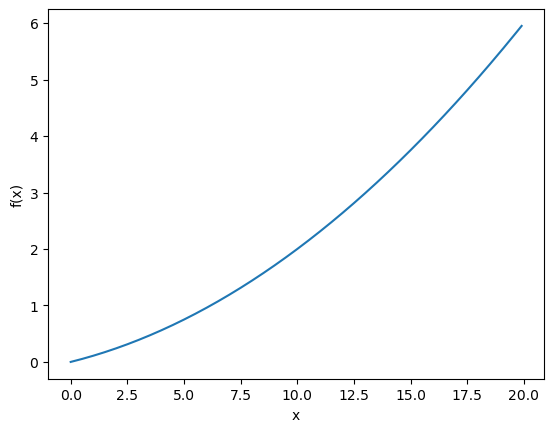

In [11]:
# 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = func_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [12]:
# x=5, x=10일 때 미분 계산하기
print(numerical_diff(func_1, 5))
print(numerical_diff(func_1, 10))

0.1999999999990898
0.2999999999986347


이렇게 계산한 미분값이 x에 대한$f(x)$의 변화량이다.(기울기)

$f(x) = 0.01x^2 + 0.1x$의 해석적 해는 $\frac{df(x)}{dx} = 0.02x + 0.1$이다.

x=5일 때와 x=10일 때의 미분값은 각각 0.2와 0.3으로 수치 미분의 결과와 거의 같다.

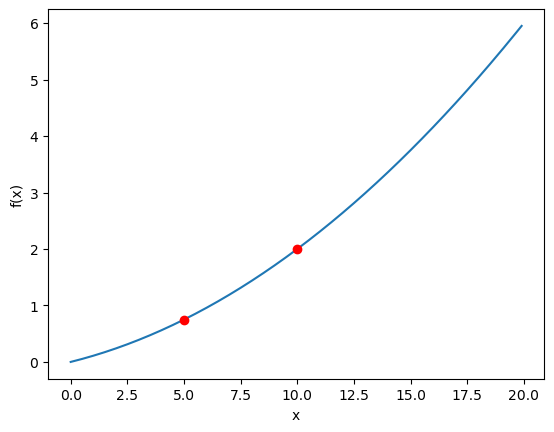

In [13]:
# x=5, x=10일 때의 접선 그리기

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = func_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(5, func_1(5), 'ro') # x=5에서의 빨간 점
plt.plot(10, func_1(10), 'ro') # x=10에서의 빨간 점
plt.show()

### 4.3.3. 편미분

대학교 수학에서 배우는 미분/적분에서는 **다변수함수**라는 함수가 중심이다. 다변수함수란 변수가 2개 이상인 함수를 말한다.

다변함수의 여러 변수 중 목표 변수 하나에 초점을 맞추고, 다른 변수는 값을 고정한다. 이를 **편미분**이라고 한다.

편미분의 결과로 나오는 함수는 **편도함수**라고 한다.

예를 들어$z=f(x,y)$라는 함수에서

x에 대한 편도함수
$$
\frac{\partial f}{\partial x} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x, y) - f(x, y)}{\Delta x}
$$

y에 대한 편도함수
$$
\frac{\partial f}{\partial y} = \lim_{\Delta y \to 0} \frac{f(x, y + \Delta y) - f(x, y)}{\Delta y}
$$

$\partial$은 `라운드`라고 읽으며 `파셜`이라고도 읽는다.


$$
식 = f(x_{0}, x_{1}) = x_{0}^{2} + x_{1}^{2}
$$

식에는 변수가 2개이다. 즉 x_{0}와 x_{1}이다. 편미분을 할때 어느 변수에 대한 미분이냐를 구별해야 한다.

$$
\frac{\partial f}{\partial x_{0}} = 2x_{0}
$$

$$
\frac{\partial f}{\partial x_{1}} = 2x_{1}
$$



**문제 1**

$x_{0}=3, x_{1}=4$일 때, $x_{0}$에 대한 편미분 $\frac{\partial f}{\partial x_{0}}$를 구하라.

In [14]:
def numerical_diff(f, x):
  """수치 미분을 구하는 함수"""
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

In [15]:
def tmp1(x0):
  return x0 * x0 + 4.0 ** 2.0

numerical_diff(tmp1, 3.0)

6.00000000000378

**문제 2**

$x_{0}=3, x_{1}=4$일 때, $x_{1}$에 대한 편미분 $\frac{\partial f}{\partial x_{1}}$를 구하라.


In [16]:
def tmp2(x1):
  return 3.0 ** 2.0 + x1 * x1

numerical_diff(tmp2, 4.0)

7.999999999999119

In [17]:
def func_2(x):
  """y = 0.01x^2 + 0.1x
  
  Arguments:
    x {float} -- x값
    
  Returns:
    float -- y값
  """
  return x[0]**2 + x[1]**2


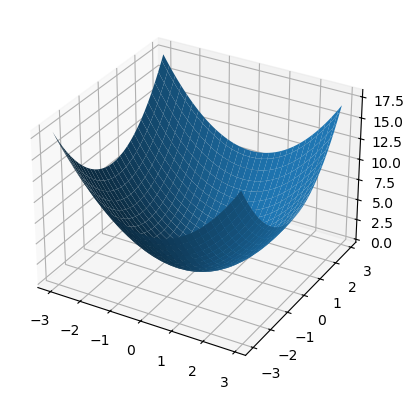

In [18]:
# render 3D plot of func_2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
z = func_2([x, y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()

이 함수를 그래프로 그리면 3차원 곡면이 된다. 이 함수를 $x_0$에 대해 편미분한 결과는 $2x_0$이다. $x_1$에 대해 편미분한 결과는 $2x_1$이다.

func_2(x)는 $x_0$와 $x_1$의 편미분을 동시에 계산한다. 편미분의 수식은$\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$로 표기한다.

In [19]:
# 문제 1 - x0=3, x1=4일 때 (x0, x1)에서의 편미분을 구하라
def func_tmp1(x0):
  return x0*x0 + 4.0**2.0

print(numerical_diff(func_tmp1, 3.0))

# 문제 2 - x0=3, x1=4일 때 (x0, x1)에서의 편미분을 구하라
def func_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(numerical_diff(func_tmp2, 4.0))

6.00000000000378
7.999999999999119


## 4.4. 기울기

앞에서는 $x_{0}$와 $x_{1}$의 편미분을 따로 계산했다. 

$x_{0}, x_{1}$를 한번에 계산한다면? $(\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial x_{1}})$처럼 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 한다.

$x_{0} = 3, x_{1} = 4$일 때의 기울기를 구해보자.

In [20]:
def numerical_gradient(f, x):
  """수치 미분으로 기울기를 계산하는 함수
  
  Arguments:
    f {function} -- 기울기를 계산할 함수
    x {np.array} -- 기울기를 계산할 위치
  """
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

`numberical_gradient(f, x)`함수의 인수인 `f`는 함수, `x`는 넘파이 배열이다.

`x`의 각 원소에 대해서 수치 미분을 구한다.

In [21]:
print(numerical_gradient(func_2, np.array([3.0, 4.0])))
print(numerical_gradient(func_2, np.array([0.0, 2.0])))
print(numerical_gradient(func_2, np.array([3.0, 0.0])))
print(numerical_gradient(func_2, np.array([3.0, 5.0])))
print(numerical_gradient(func_2, np.array([9.0, 11.0])))

[6. 8.]
[0. 4.]
[6. 0.]
[ 6. 10.]
[18. 22.]


(x_{0}, x_{1})의 각 점에서 기울기를 계산할 수 있다.

**기울기의 이미**

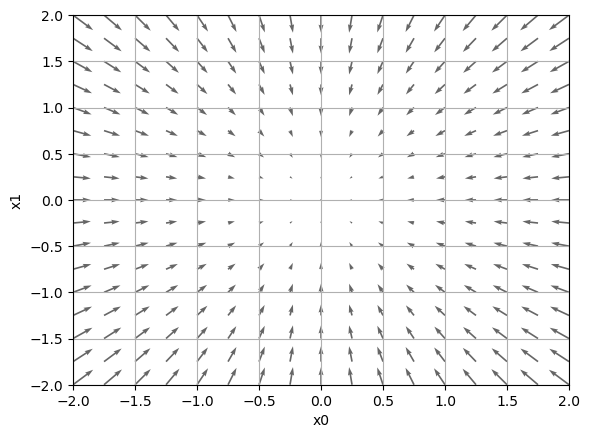

In [22]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열을 생성
  
  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + h
    fxh1 = f(x) # f(x+h)
    
    x[idx] = tmp_val - h
    fxh2 = f(x) # f(x-h)
    grad[idx] = (fxh1 - fxh2) / (2*h)
    
    x[idx] = tmp_val # 값 복원
    
  return grad

def numerical_gradient(f, X):
  if X.ndim == 1:
    return _numerical_gradient_no_batch(f, X)
  else:
    grad = np.zeros_like(X)
    
    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f, x)
    
    return grad
  
def function_2(x):
  if x.ndim == 1:
    return np.sum(x**2)
  else:
    return np.sum(x**2, axis=1)


def tangent_line(f, x):
  d = numerical_gradient(f, x)
  print(d)
  y = f(x) - d*x
  return lambda t: d*t + y

## -- 그래프 그리기

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()


기울기는 그림처럼 방향을 가진 벡터(화살표)로 그려진다.

기울기는 함수의 '가장 낮은 장소(최소값)'을 가리킨다. (반드시 그렇다고 할 수 없다.)

***기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.***

가장 낮은 곳에서 멀어질수록 화살표의 크기가 커진다.


### 4.4.1. 경사법(경사 하강법)

기계학습 문제는 대부분 학습 단계에서 최적의 매개변수를 찾아야한다.

신경망도 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야한다.

**최적**이란 손실 함수가 최솟값이 될 때의 매개변수 값이다.

이때 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.

각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기이다.

함수가 극솟값, 최솟값, 또 안장점(saddle point)이 되는 곳에서 기울기가 0이다. 우리가 찾고자 하는 것은 기울기가 0인 곳이다.

따라서 최솟값이 아닌 극솟값이나 안장점에서도 기울기가 0이므로, 함수가 0이 되는 곳이 반드시 최솟값이라고 할 수 없다.

**경사법 수식**


$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$
$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

$\eta$는 갱신하는 양을 나타내며, 이를 신경망 학습에서는 *학습률*이라고 한다.

한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.

학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 한다.

학습률이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다.

In [23]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  """경사 하강법으로 f를 최소화하는 함수

  Args:
      f (ndarray): 최적화하려는 함수
      init_x (ndarray): 초기값
      lr (float, optional): 학습률. Defaults to 0.01.
      step_num (int, optional): 경사 하강법 단계 수. Defaults to 100.

  Returns:
      ndarray: 최종 위치
  """
  x = init_x
  x_history = []

  for i in range(step_num):
    x_history.append(x.copy())

    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x # 최종 위치

**문제**

경사 하강법으로$f(x_{0}, x_{1}) = x_{0}^{2} + x_{1}^{2}$의 최솟값을 구하라.

In [24]:
def func_2(x):
  return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
gradient_descent(func_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

초기값을 (3.0, 4.0)으로 설정하고, 경사법에 의해 (0, 0)에 가까운 결과를 얻어야 한다.

최종 결과는 (-6.11110793e-10, -8.14814391e-10)이다. 거의 (0, 0)에 가깝다.

경사법에 의한 $f(x_{0}, x_{1}) = x_{0}^{2} + x_{1}^{2}$을 그래프로 그려보자.

학습률이 너무 크면 큰 값으로 발산하고, 너무 작으면 거의 갱신되지 않은 채 끝나버린다.

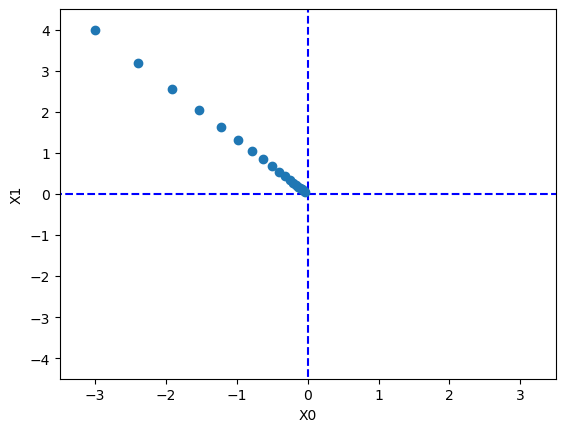

In [26]:
# 경사법에 의한 f(x0, x1) = x0^2 + x1^2의 최솟값 그래프 그리기

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [25]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(func_2, init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(func_2, init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 4.4.2. 신경망에서의 기울기

신경망에서도 기울기(가중치 매개변수에 대한 손실 함수의 기울기)를 구해야한다. 형상이 2x3, 가중치가 W, 손실 함수가 L인 신경망의 경사는 $\frac{\partial L}{\partial W}$로 나타낸다.


$$
W = \begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \end{pmatrix}
$$

$$
\frac{\partial L}{\partial W} = 
  \begin{pmatrix}
    \frac{\partial L}{\partial w_{11}} & 
    \frac{\partial L}{\partial w_{21}} &
    \frac{\partial L}{\partial w_{31}} \\
    \frac{\partial L}{\partial w_{12}} &
    \frac{\partial L}{\partial w_{22}} &
    \frac{\partial L}{\partial w_{32}}
\end{pmatrix}
$$

$\frac{\partial L}{\partial W}$의 각 원소는 각각의 원소에 대한 편미분이다.

1행 1번째 원소인 $\frac{\partial L}{\partial w_{11}}$은 $w_{11}$을 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐를 나타낸다.

$\frac{\partial L}{\partial W}$의 형상은 $W$와 같다.


In [36]:
# SimpleNet 구현하기

def softmax(x):
  """Softmax 함수

  Description:
    Softmax 함수는 입력 값을 정규화하여 출력한다. 이때, 출력값은 0에서 1 사이의 실수이며, 총합은 1이다.
    오버플로우를 방지하기 위해 입력값에서 최대값을 빼준다. keepdims=True로 설정하여 브로드캐스트를 수행한다.
    브로드캐스트를 수행하면, 최대값을 빼줄 때, 입력값 x의 형상을 유지한 채로 계산할 수 있다.
    참 좋은 방법이다. -_-''?

  Arguments:
      x (ndarray): 입력값

  Returns:
      ndarray: softmax 함수의 결과
  """
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
  return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x)
  
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x) # f(x+h)
    
    x[idx] = tmp_val - h 
    fxh2 = f(x) # f(x-h)
    grad[idx] = (fxh1 - fxh2) / (2*h)
    
    x[idx] = tmp_val # 値を元に戻す
    it.iternext()   
      
  return grad

def cross_entropy_error(y, t):
  """교차 엔트로피 오차를 구하는 함수
  
  $$ L = -\sum_{k} t_k \log y_k $$

  Args:
      y (np.array): 예측값
      t (np.array): 정답 레이블

  Returns:
      float: 교차 엔트로피 오차
  """
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
      
  # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
  if t.size == y.size:
    t = t.argmax(axis=1)
            
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class SimpleNet:
  """SimpleNet
  
  Attributes:
    W {np.array} -- 가중치
    
  Methods:
    predict(x) -> np.array -- 예측
    loss(x, t) -> float -- 손실함수의 값을 구함
  """
  def __init__(self):
    """가중치를 초기화한다.
    """
    self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
  def predict(self, x):
    """예측을 수행한다.
    
    Description:
      예측은 단순한 행렬의 곱셈으로 이루어진다.
          
    Arguments:
        x {np.array} -- 입력값

    Returns:
        np.array -- 예측값
    """
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    
    return loss  

In [43]:
net = SimpleNet()
print(net.W)

[[-1.63569519  1.00180486 -0.17861393]
 [ 2.18326932  0.07407941  0.10397737]]


In [44]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0, 0, 1])
print(net.loss(x, t))

[ 0.98352527  0.66775438 -0.01358873]
0
1.7381785762251547


In [46]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.28596343  0.20853211 -0.49449555]
 [ 0.42894515  0.31279817 -0.74174332]]


`numberical_gradient(f, x)`의 인수 `f`는 함수, `x`는 함수 f의 인수이다.

net.W를 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의한다.

정의한 함수 f를 `numberical_gradient(f, x)`에 넣어 기울기를 구한다.

dW는 `numberical_gradient(f, net.W)`의 결과로 그 형상은 2x3의 2차원 배열이다.

dW의 내용을 보면, $\frac{\partial L}{\partial W}$의 각 원소에 대한 기울기가 저장되어 있다.

## 4.5. 학습 알고리즘 구현하기

신경망 학습 절차는 다음과 같다.

1. 미니배치
훈련 데이터 중 일부를 무작위로 가져온다. 이 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

2. 기울기 산출
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3. 매개변수 갱신
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4. 반복
1~3단계를 반복한다.

### 4.5.1. 2층 신경망 클래스 구현하기

In [47]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
  
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)  # 첫 번째 층의 가중치
    self.params['b1'] = np.zeros(hidden_size)                                       # 첫 번째 층의 편향
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # 두 번째 층의 가중치
    self.params['b2'] = np.zeros(output_size)                                       # 두 번째 층의 편향
    
  def predict(self, x):
    """예측을 수행하고 결과를 반환한다.

    Args:
        x (np.array): 입력값
        
    Returns:
        np.array: 예측값
    """
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y
    
  
  def loss(self, x, t):
    """손실함수의 값을 구한다.

    Args:
        x (np.array): 입력값
        t (np.array): 정답 레이블

    Returns:
        float: 손실함수의 값 (교차 엔트로피 오차)
    """
    y = self.predict(x)
    return cross_entropy_error(y, t) # 손실함수의 값을 구함 (교차 엔트로피 오차)
  
  
  def accuracy(self, x, t):
    """정확도를 구한다.

    Args:
        x (np.array): 입력값
        t (np.array): 정답 레이블

    Returns:
        float: 정확도
    """
    y = self.predict(x) # 예측값
    y = np.argmax(y, axis=1) # 예측값 중 가장 큰 값의 인덱스를 구함
    t = np.argmax(t, axis=1) # 정답 레이블 중 가장 큰 값의 인덱스를 구함
    
    accuracy = np.sum(y == t) / float(x.shape[0]) # 정확도를 구함
    return accuracy
    
    
  def numerical_gradient(self, x, t):
    """기울기를 수치 미분으로 구한다.

    Args:
        x (np.array): 입력값
        t (np.array): 정답 레이블

    Returns:
        dict: 기울기
    """
    loss_W = lambda W: self.loss(x, t)
    
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
    return grads
  
  def gradient(self, x, t):
    """기울기를 구한다.

    Args:
        x (np.array): 입력값
        t (np.array): 정답 레이블
    
    Returns:
        dict: 기울기
    """
    
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    grads = {}
    batch_num = x.shape[0]
    
    #forward
    a1= np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    #backward
    dy = (y - t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis=0)
    
    dz1 = np.dot(dy, W2.T)
    da1 = sigmoid_grad(a1) * dz1
    grads['W1'] = np.dot(x.T, da1)
    grads['b1'] = np.sum(da1, axis=0)
    return grads
    

In [48]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2. 미니배치 학습 구현하기

* 훈련 데이터 중 일부를 무작위로 가져온다.
* 경사법으로 매개변수 를 갱신한다.

In [49]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1 # 학습률

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  # 기울기 계산
  grad = network.gradient(x_batch, t_batch)
  
  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
    
  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  
  # 1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"train acc, test acc | {train_acc}, {test_acc}")



train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.797, 0.801
train acc, test acc | 0.8789, 0.8829
train acc, test acc | 0.8983333333333333, 0.9021
train acc, test acc | 0.90785, 0.9107
train acc, test acc | 0.914, 0.9174
train acc, test acc | 0.91915, 0.9214
train acc, test acc | 0.9228, 0.9237
train acc, test acc | 0.9257166666666666, 0.9254
train acc, test acc | 0.9295333333333333, 0.9301
train acc, test acc | 0.93245, 0.9321
train acc, test acc | 0.9338666666666666, 0.9332
train acc, test acc | 0.9361166666666667, 0.9348
train acc, test acc | 0.9391333333333334, 0.9389
train acc, test acc | 0.9408833333333333, 0.9393
train acc, test acc | 0.9426166666666667, 0.9399
train acc, test acc | 0.9443166666666667, 0.9424


* 미니배치의 크기를 100으로 설정했다. 60,000개의 훈련 데이터에서 임의로 100개의 데이터를 추출한다.
* 경사법에 의한 갱신 횟수를 10,000번으로 설정했다.
* 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가했다.
* 이 손실 함수의 값이 서서히 줄어드는 것을 확인할 수 있다. (?)

### 4.5.3. 시험 데이터로 평가하기

미니배치를 사용하여 학습하면서 손실 함수의 값이 줄어든다. 여기서 '손실 함수의 값이란' 미니배치의 손실 함수를 말한다.

신경망 학습에서 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야한다.


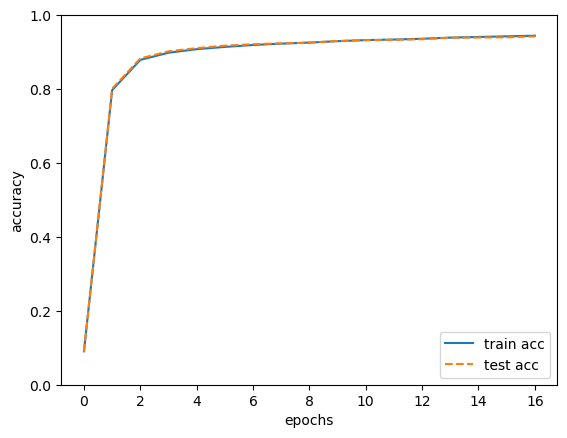

In [50]:
# 훈련 데이터와 시험 데이터에 대한 정확도 추이 그래프 그리기

import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에 대한 정확도를 실선, 시험 데이터에 대한 정확도를 점선으로 나타냈다.

훈련 데이터와 시험 데이터를 대상으로 정확도 추이를 보면, 두 정확도에는 차이가 없다. 이것은 오버피팅이 일어나지 않았다는 것을 의미한다.